# Initial model
Simulation of random map with $n=50$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tk
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

from scipy.stats import ks_2samp
import scipy.stats as sc
from scipy.special import rel_entr

import warnings
warnings.filterwarnings("ignore")

import seaborn as sn

plt.rcParams.update({'font.size': 20})

---
### 1. Paramters

In [2]:
Niter = int(1e6)
a0 = 2
var = .8
z0 = 1

n = 50

---
### 2. Simulation

In [3]:
beta = np.random.randn(Niter)
beta = np.sqrt(var)*beta

def controller_MLE(t,c_,z_,n=1):
    '''
    MLE estimator for one step lookback, as derived in Eurich and Pawelzik.
    Returns c_t = c_{t-1} + z_t/z_{t-1}
    '''
    if t<n:
        ct = np.sum( (c_[0:t]*(z_[0:t]**2)+z_[0:t]*z_[1:t+1])) / np.sum((z_[0:t]**2))
        #ct = 0#c_[t-1] + z[t]/z[t-1]
    else:
        ct = np.sum( (c_[t-n:t]*(z_[t-n:t]**2)+z_[t-n:t]*z_[t-n+1:t+1])) / np.sum((z_[t-n:t]**2) )
    return ct


z = np.zeros(Niter)
z[0] = z0
z[1] = a0*z[0] + beta[0]

c = np.zeros(Niter)
c[0] = 0
c[1] = z[1]

z[2] = (a0-c[1])*z[1] + beta[1]

for t in range(2,Niter-1):
    z[t+1]=z[t]*(a0-c[t])+beta[t]
    c[t+1]=controller_MLE(t,c,z,n) 

In [4]:
np.savetxt("Data/n=50.csv",z, delimiter=" ")

---
### 3. Analysis

In [5]:
print( "<z^2> = {:.2f}".format(np.var(z)) )

<z^2> = 0.82


In [6]:
print( "<z> = {:.2e}".format(np.mean(z)) )

<z> = -8.36e-04


In [7]:
print("max(z)={:.2e}".format(np.max(z)))

max(z)=4.54e+00


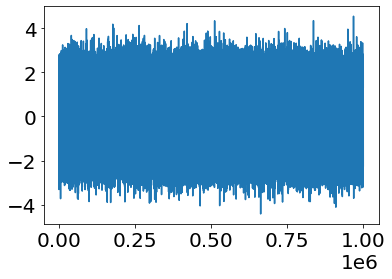

In [8]:
plt.plot(z)

In [23]:
norm = np.random.normal(0,np.std(z),Niter)
print(ks_2samp(z,norm))

In [27]:
# Average of KS statistics 
ks = [ks_2samp(z,norm2[:,i]) for i in range(100)]
np.mean(ks,axis=0)

array([0.00115116, 0.55412971])

In [32]:
# Aderson test
sc.anderson(z)

AndersonResult(statistic=0.38286681135650724, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [33]:
# Historgram in log to see the tail 

In [18]:
hist_z = np.histogram(z,bins=10000,density=True)
x=np.linspace(-10,10,10000)

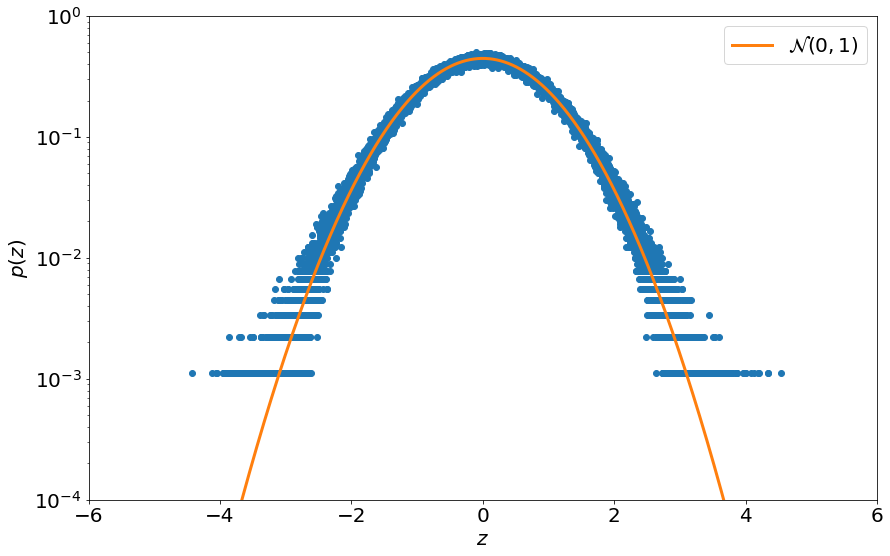

In [19]:
plt.figure(figsize=(8*1.6,8))
#plt.hist((z-np.mean(z))/np.std(z),bins=1000,density=True,label=r'$p(z/\sigma_0^2)$');


plt.plot(hist_z[1][:-1],hist_z[0],'o')


plt.plot(x,sc.norm.pdf(x,0,np.sqrt(var)),label=r'$\mathcal{N}(0,1)$',linewidth=3)


plt.xlabel(r'$z$')
plt.ylabel(r'$p(z)$')
plt.legend();
#plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.xlim([-6,6])
plt.ylim([1e-4,1]);
plt.axvline(x=np.sqrt(n*np.log(n)))
plt.axvline(x=-np.sqrt(n*np.log(n)))

In [25]:
ecdf = ECDF(z)

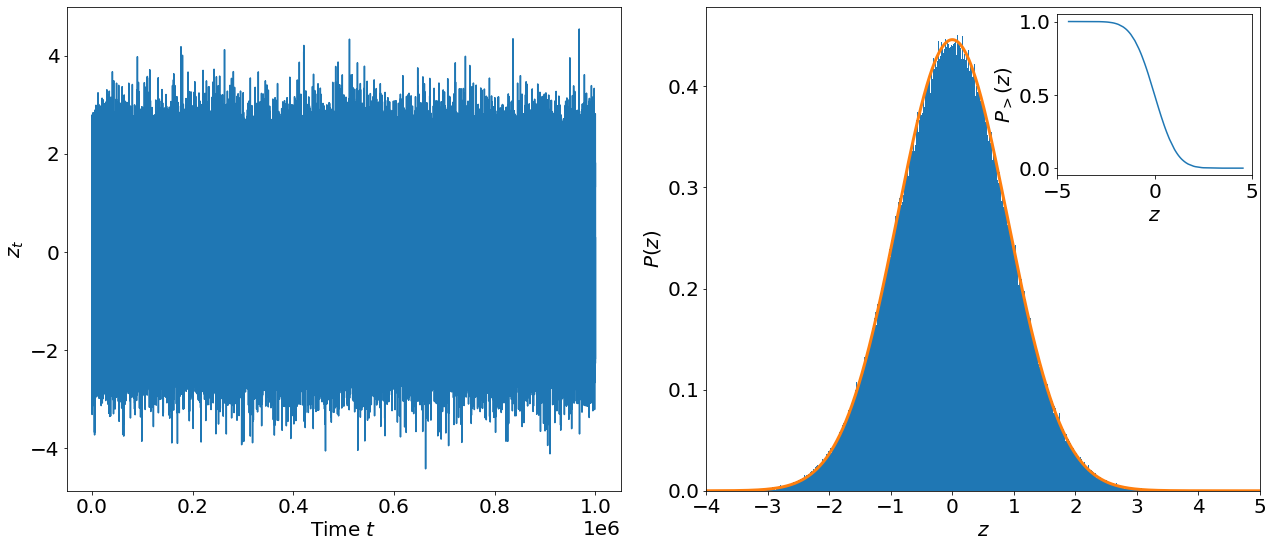

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,8))
axes[0].plot(z)
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('$z_t$')
axes[0].set_aspect('auto',anchor='C')

axes[1].hist(z,bins=1000,density=True,label=r'$P(z)$');
axes[1].plot(x,sc.norm.pdf(x,0,np.sqrt(var)),label=r'$\mathcal{N}(0,\sigma_0^2)$',linewidth=3)
axes[1].set_ylabel(r'$P(z)$')
axes[1].set_xlabel(r'$z$');
axes[1].set_xlim([-4,5])
axes[1].set_aspect('auto',anchor='C')

left, bottom, width, height = [0.827, 0.67, 0.15, 0.28]
inset = fig.add_axes([left, bottom, width, height])
inset.plot(ecdf.x, 1-ecdf.y,label='$P_>(z)$');
#ax2.plot(x, 1-sc.norm.cdf(x),label='n={}'.format(n));
#ax2.set_xlim([-6,5])
inset.set_xlabel(r'$z$');
inset.set_ylabel(r'$P_>(z)$');
inset.set_xticks([-5,0,5]);



fig.tight_layout();
#plt.savefig('GraphsR5/dist_n=50.pdf')